# Data Analysis of Auction model

**No average bid increases for sniper bidder, no watch probability**

Sniper bidders' internal valuations are updated by a scalar factor drawn from a unifrom distribution in the range [1.2, 2.0]

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global variable (which was used in the batch runs)
AUCTION_LENGTH = 100

In [14]:
legacy_df = pd.read_csv("../data/results_legacy_no_bidincrease_sniper_no_watchproba.csv", index_col=0)

## Getting final row of each epoch

I.e., winning bids of each epoch

In [15]:
splits = np.where(legacy_df["Highest Bid"] == 0)[0]
splits = np.delete(splits, 0)
splits = np.append(splits, len(legacy_df["Highest Bid"]-1))
final_rows = splits - 1
print(final_rows)

[    100     201     302 ... 1009797 1009898 1009999]


In [16]:
final_prices_df = legacy_df.iloc[final_rows]
# Removing any rows which contain 0 or None
# These are edge cases where the model does not receive any bids in the first few timesteps
final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)

C:\Users\Will\AppData\Local\Temp\ipykernel_2108\1367672686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)


### Plotting histograms of winning bids

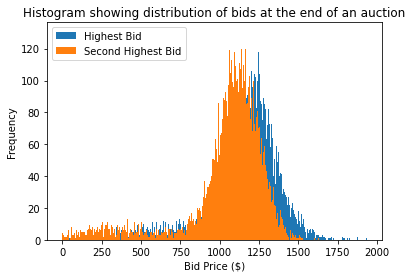

In [17]:
final_prices_df.plot.hist(bins=500)
plt.title("Histogram showing distribution of bids at the end of an auction")
plt.xlabel("Bid Price ($)")
plt.show()

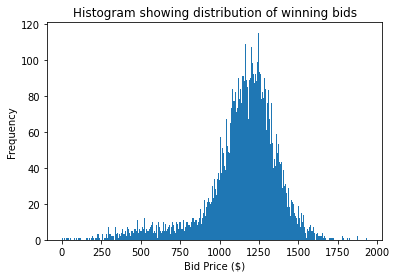

In [18]:
final_prices_df["Highest Bid"].plot.hist(bins=500)
plt.title("Histogram showing distribution of winning bids")
plt.xlabel("Bid Price ($)")
plt.show()

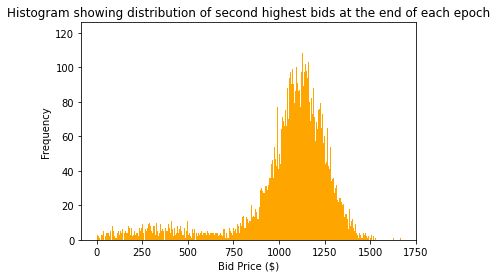

In [19]:
final_prices_df["Second Highest Bid"].plot.hist(bins=500, color="orange")
plt.title("Histogram showing distribution of second highest bids at the end of each epoch")
plt.xlabel("Bid Price ($)")
plt.show()

## Calculating win ratio of EarlyBidder : SniperBidder

In [20]:
earlyBidderWinPercent = 100 * (len(np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]) / len(final_prices_df["Highest Bidder"]))
sniperBidderWinPercent = 100 - earlyBidderWinPercent

In [21]:
print(f'EarlyBidder win percentage: {earlyBidderWinPercent:.2f}%')
print(f'SniperBidder win percentage: {sniperBidderWinPercent:.2f}%')

EarlyBidder win percentage: 60.70%
SniperBidder win percentage: 39.30%


## Finding sniper bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [22]:
sniper_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "SniperBidder")[0]]

In [23]:
sniper_bidder_premiums = (sniper_bidder_wins["Highest Bid"] - sniper_bidder_wins["Second Highest Bid"]) / sniper_bidder_wins["Second Highest Bid"]
print(sniper_bidder_premiums)

302        0.394346
403        0.051808
908        0.305620
1009       0.072687
1413       0.064777
             ...   
1009090    0.286784
1009191    0.043737
1009292    0.003603
1009494    0.126776
1009595    0.016572
Length: 3930, dtype: float64


In [24]:
mean_sniper_premium = np.mean(sniper_bidder_premiums)
print(f'Mean sniper bidder premium: {mean_sniper_premium}')
median_sniper_premium = np.median(sniper_bidder_premiums)
print(f'Median sniper bidder premium: {median_sniper_premium}')

Mean sniper bidder premium: 0.1301109524070983
Median sniper bidder premium: 0.09468902289895352


## Finding early bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [25]:
early_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]]

In [26]:
early_bidder_premiums = (early_bidder_wins["Highest Bid"] - early_bidder_wins["Second Highest Bid"]) / early_bidder_wins["Second Highest Bid"]
print(early_bidder_premiums)

100        0.037131
201        0.689495
504        0.014548
605        0.022501
706        0.167363
             ...   
1009393    1.417477
1009696    1.010080
1009797    0.073490
1009898    0.008946
1009999    0.123720
Length: 6070, dtype: float64


In [27]:
mean_early_bidder_premium = np.mean(early_bidder_premiums)
print(f'Mean early bidder premium: {mean_early_bidder_premium}')
median_early_bidder_premium = np.median(early_bidder_premiums)
print(f'Median early bidder premium: {median_early_bidder_premium}')

Mean early bidder premium: 0.7996740302022696
Median early bidder premium: 0.041478266606623036


## Finding mean auction bid (highest and second highest) at each timestep

In [28]:
mean_bids = legacy_df.groupby(np.arange(len(legacy_df))%(AUCTION_LENGTH+1)).mean()
print(f'Mean winning bid: {mean_bids["Highest Bid"][len(mean_bids)-1]}')

Mean winning bid: 1144.4324491064267


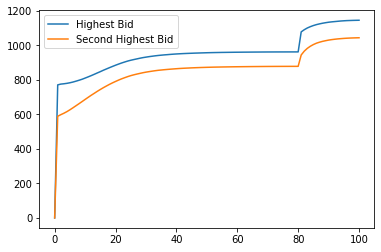

In [29]:
mean_bids.plot()
plt.show()

The noticeable jump from timestep 80 onwards characterises the SniperBidders being activated (for this dataset, bidTimeframe was set to 20). 

Notice how this strategy (i.e., not using average bid increase) results in bidders paying a high premium ($1143 on average vs $1055 for the bid-increase strategy).
- However, SniperBidders win much more frequently using the no bid increase strategy compared to those who use it (40.08% vs 13.18%)